# Data Processing

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('googleplaystore.csv')
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Description of Dataset columns
1. App : The name of the app
2. Category : The category of the app
3. Rating : The rating of the app in the Play Store
4. Reviews : The number of reviews of the app
5. Size : The size of the app
6. Install : The number of installs of the app
7. Type : The type of the app (Free/Paid)
8. The price of the app (0 if it is Free)
9. Content Rating :The appropiate target audience of the app
10. Genres: The genre of the app
11. Last Updated : The date when the app was last updated
12. Current Ver : The current version of the app
13. Android Ver : The minimum Android version required to run the app

## Data Cleaning

In [4]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
df.Rating.median() 

4.3

In [6]:
# Fill NaN with median value
median_rating = df.Rating.median()
df.Rating.fillna(median_rating, inplace = True)

In [7]:
# This price is 0 So fill in it with Free 
df.Type.fillna("Free", inplace=True) 

In [8]:
# value_counts().idxmax() is used to find the Android version with the highest frequency (i.e., the most common Android version)
# in the 'Android Ver' column of the DataFrame df. I Replace NaN with this value.
most_frequent_andoid = df['Android Ver'].value_counts().idxmax()
df["Android Ver"].fillna(most_frequent_andoid, inplace=True)

In [9]:
df['Android Ver'].value_counts()

4.1 and up            2454
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [10]:
most_frequent_andoid

'4.1 and up'

In [11]:
# "Unrated" was filled in NaN value
df["Content Rating"].fillna("Unrated", inplace=True) 

In [12]:
# It's hard to fill NaN with any value, so like a few cells, "Varies with device" was filled in.
df["Current Ver"].fillna("Varies with device", inplace=True)  

In [13]:
# found value with '1,000+' in one of record, remove it from data_frame as uncertain whether it is 'M' or 'k'
index = df[df['Size'] == '1,000+'].index
df.drop(axis=0, inplace=True, index=index)

In [14]:
#index = df[df['Size'] == '1,000+'].index
#index

In [15]:
# Clean '$' symbol from the 'Price' column
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = df['Price'].astype(float)

C:\Users\teket\AppData\Local\Temp\ipykernel_17692\3250214243.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '')


In [16]:
# Remove ',' and '+' characters from the 'Value' column
df['Installs'] = df['Installs'].str.replace(r'[,+]', '', regex=True)



In [17]:
# Define a function to process the column values
def process_column_value(value):
    if value == 'Varies with device':
        return 0.0
    elif value.endswith('M'):
        return float(value[:-1])
    elif value.endswith('k'):
        return float(value[:-1]) / 1024
    else:
        return value

# Apply the function to the column values
df['Size'] = df['Size'].apply(process_column_value)

In [18]:
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     0.0
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [19]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [20]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [22]:
# save cleaned data to a new CSV file
df.to_csv('GooglePlayStore_cleaned.csv', index=False)

In [ ]:
###  I did "Size" column cleaning in Excel using the following formular
###  Remove 'M' and convert 'k'/kilobytes into megabytes, also  change 'Varies with device' into 0
###  =IF(E2="Varies with device",0,IF(RIGHT(E2,1)="M",SUBSTITUTE(E2,"M","")+0,IF(RIGHT(E2,1)="k",(SUBSTITUTE(E2,"k","")+0)/1024,E2)))

# Exploratory Data Analysis on Google Play Store

# Category

In [23]:
# Load new cleaned dataset
df = pd.read_csv('googleplaystore_cleaned.csv')

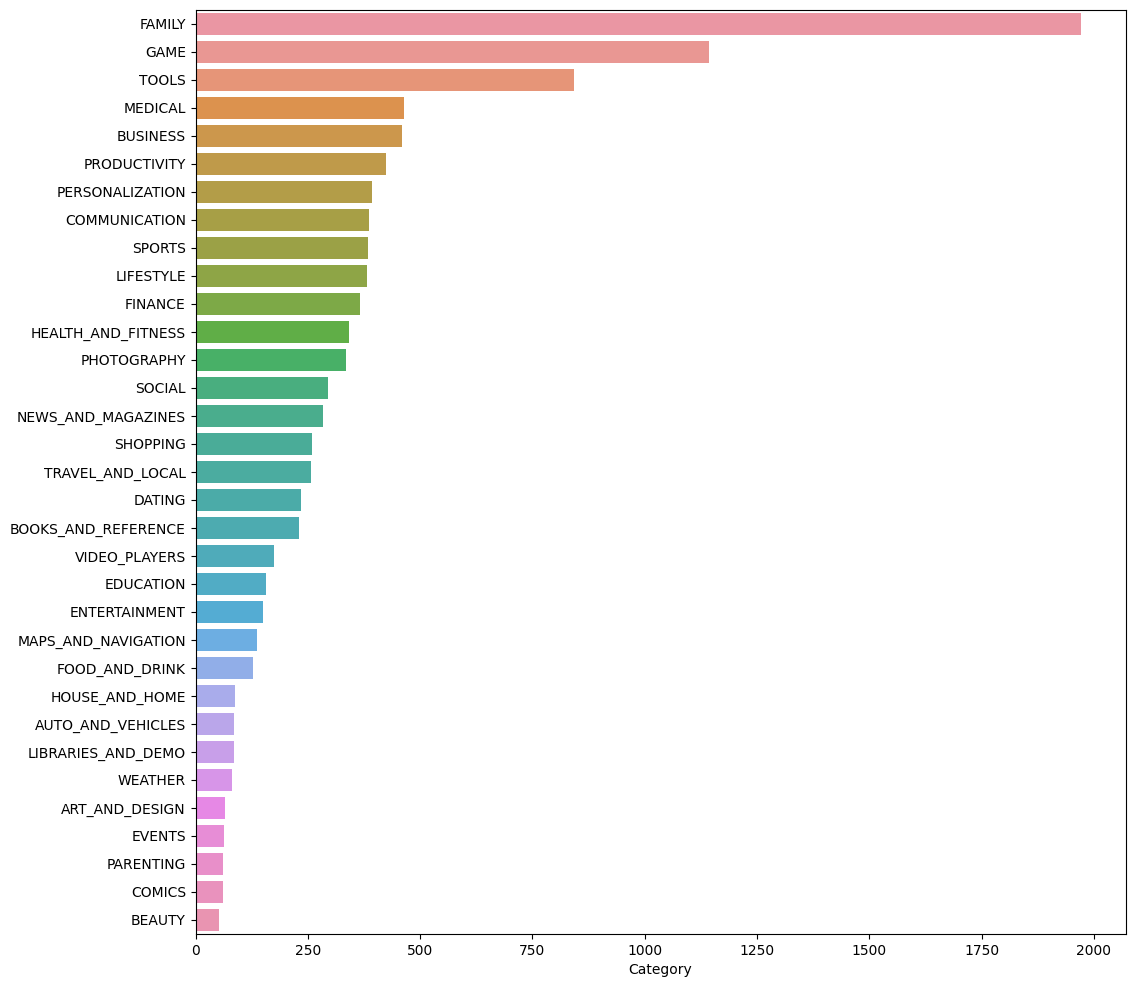

In [24]:
# Creat category bar chart 
plt.figure(figsize=(12,12))
app_cat = df.Category.value_counts()
sns.barplot(x=app_cat, y=app_cat.index, data=df);

<AxesSubplot: xlabel='Installs', ylabel='Category'>

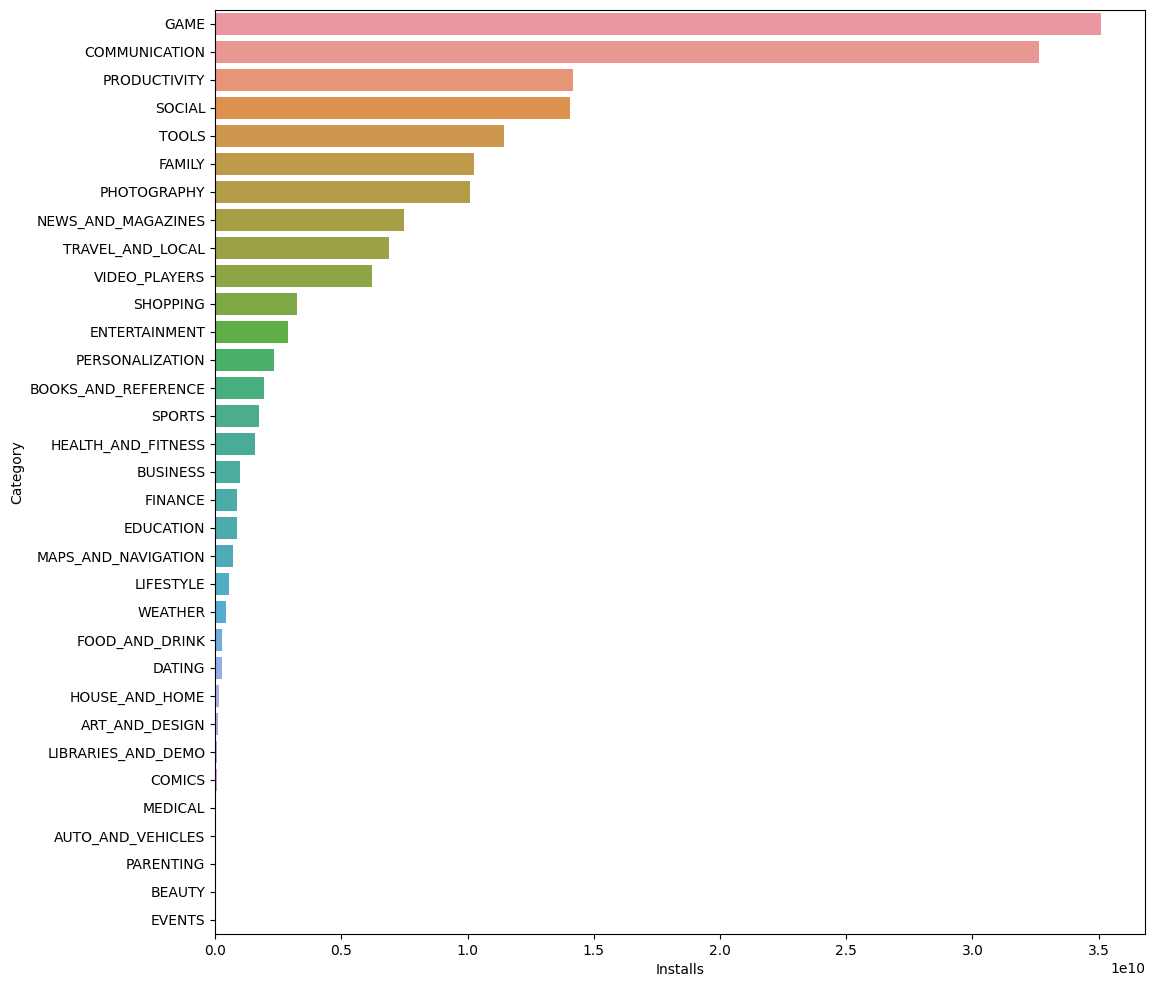

In [47]:
plt.figure(figsize=(12,12))
sum_inst = df.groupby(['Category'])['Installs'].sum().sort_values(ascending=False)
sns.barplot(x=sum_inst, y=sum_inst.index, data=df)

# Rating

#### From the bar chart we know that most of the apps in the play store are from the categories of 'Family', 'Game', and 'Tools'

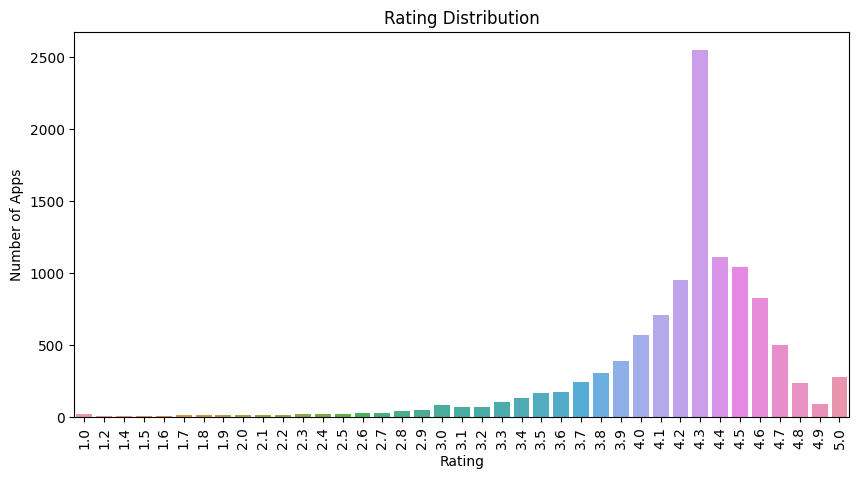

In [25]:
# Show the distribution of rating
plt.figure(figsize=(10, 5))
sns.countplot(x='Rating', data=df)
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

#### From this distribution plotting, it shows that most of the apps in the Play Store are in the range of 4 to 4.7.

# Application Type

In [26]:
# Filter the dataset to get the counts for natural and technological disasters
Free_Type = df[df['Type'] == 'Free']
Paid_Type = df[df['Type'] == 'Paid']

In [27]:
# Get the counts for natural and technological disasters
Free_Type_count = Free_Type.shape[0]
Paid_Type_count = Paid_Type.shape[0]
Free_Type_count

10040

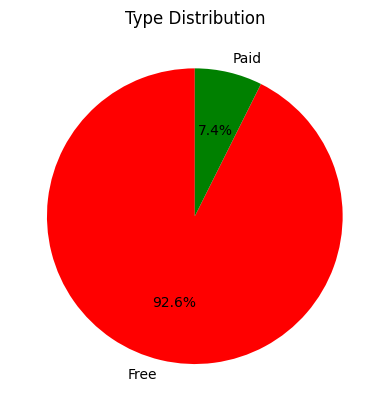

In [28]:
# application type distribution
labels = ['Free', 'Paid']
colors = ['red', 'Green']
sizes = [Free_Type_count, Paid_Type_count]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Type Distribution')
plt.show()

#### From the plot we can imply that majority of the apps in the Play Store are Free apps.

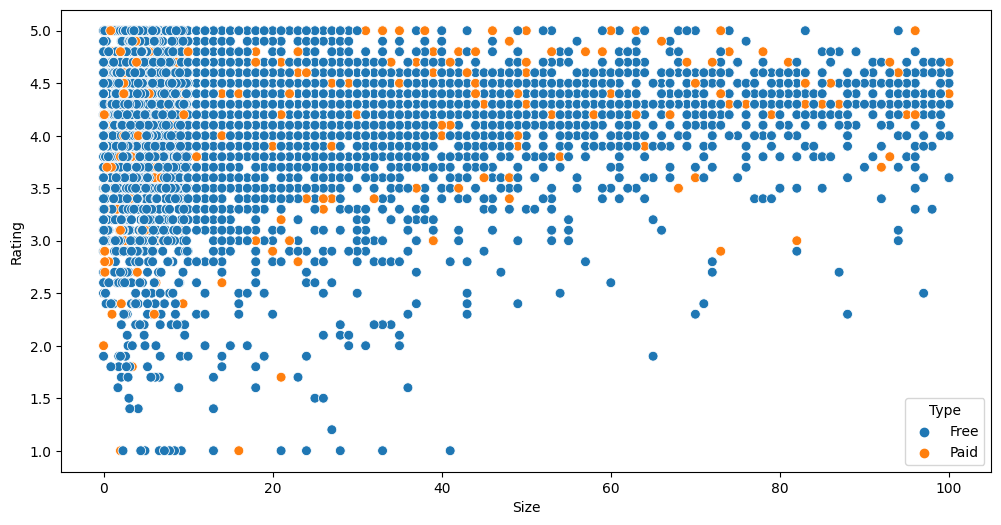

In [30]:
# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Size', y='Rating', hue='Type', data=df, s=50)

# Show the plot
plt.show()

#### From this scatter plot, we can see that majority of the free apps are  in small size and having high rating. While for paid apps, we have quite equal distribution in term on size and rating.

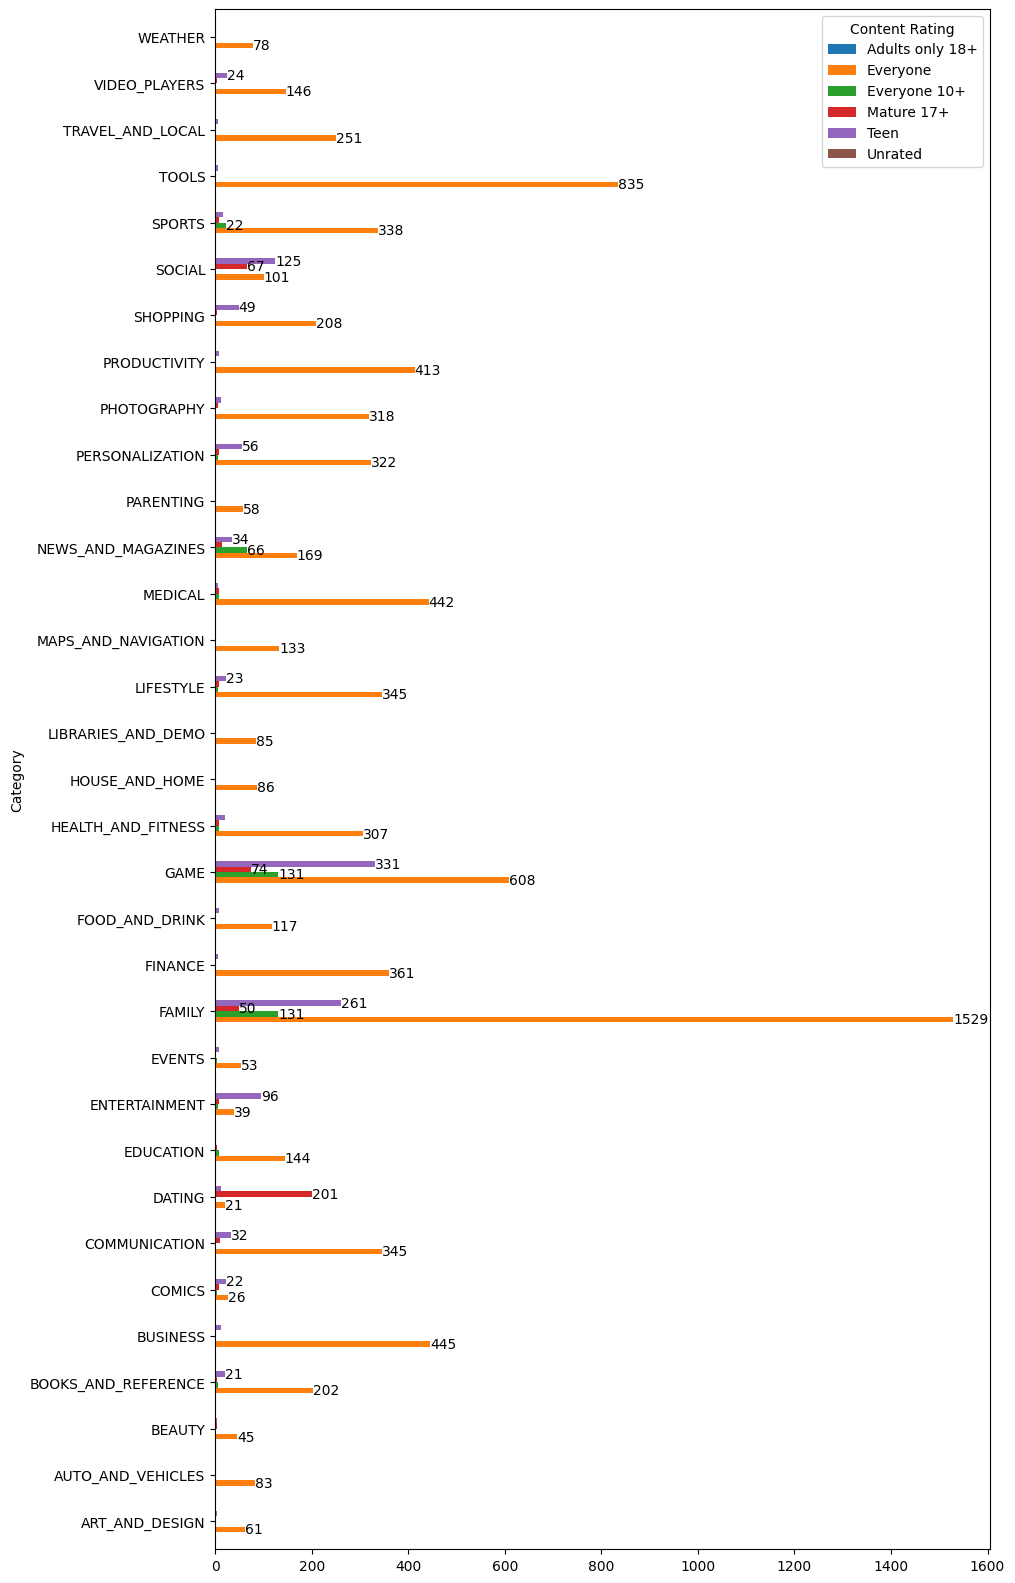

In [35]:

# Groupby and create a horizontal bar chart
Type_cat = df.groupby('Category')['Content Rating'].value_counts().unstack().plot.barh(figsize=(10,20), width=0.7)

# Add numbers on the bars for values greater than 20
for i in Type_cat.containers:
    for j in i:
        width = j.get_width()
        if width > 20:
            plt.annotate(f'{int(width)}', (width, j.get_y() + j.get_height() / 2), ha='left', va='center')

# Show the chart
plt.show()

In [36]:
#### For Teen group, the relative high amount of app category are 'Social', 'Game', and 'Dating'. 
#### These apps can take up a lot of time for young people.
#### 'Tools', 'Family', 'Game' are the Top 3 Categories for everyone.

In [39]:
# 1. What is the top 5 apps on the basis of installs?
data = df.sort_values(by=['Installs'], ascending=False)
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3896,Subway Surfers,GAME,4.5,27711703,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3943,Facebook,SOCIAL,4.1,78128208,0.0,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
3523,Google Drive,PRODUCTIVITY,4.4,2731211,0.0,1000000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
3565,Google Drive,PRODUCTIVITY,4.4,2731211,0.0,1000000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
2884,Google Photos,PHOTOGRAPHY,4.5,10859051,0.0,1000000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,0.0,1000000000,Free,0.0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
2853,Google Photos,PHOTOGRAPHY,4.5,10858538,0.0,1000000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
4234,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,0.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,0.0,1000000000,Free,0.0,Teen,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device


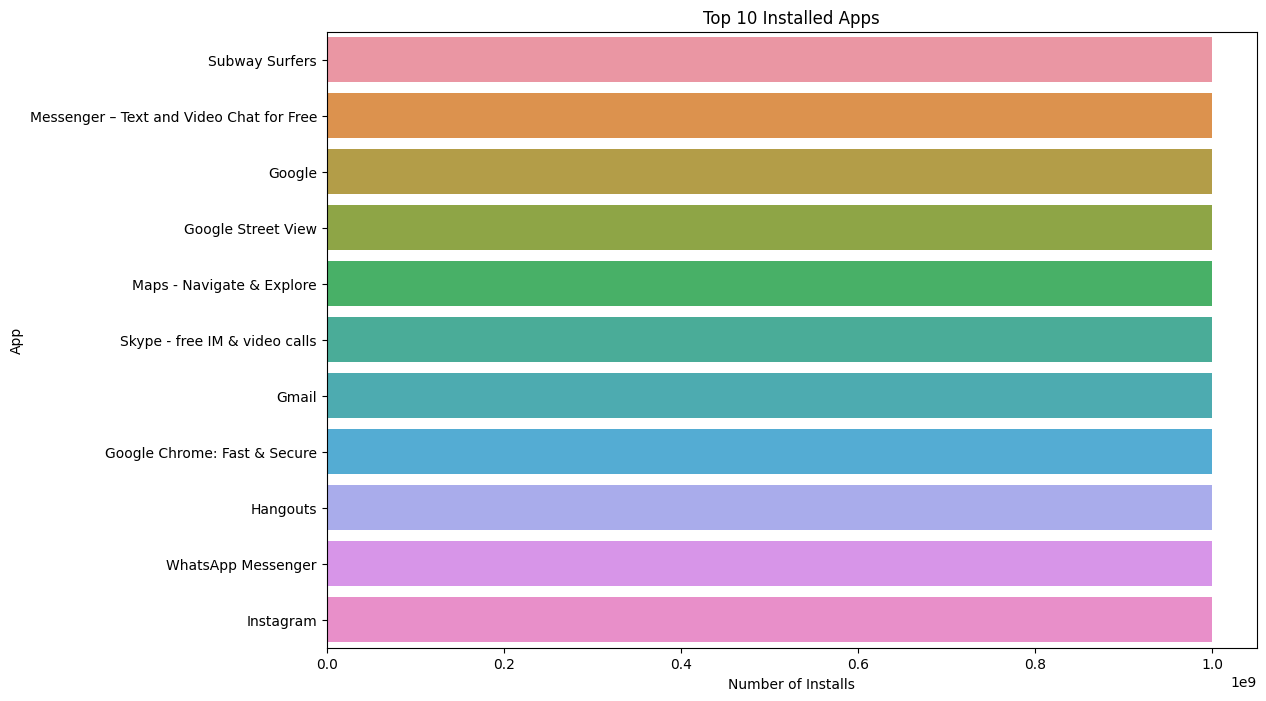

In [45]:
# Sort data by "Installs" column in descending order and select top 10 rows
top10_apps = data.sort_values(by='Installs', ascending=False).head(20)

# Create bar chart
plt.figure(figsize=(12,8))
sns.barplot(x='Installs', y='App', data=top10_apps, orient='h')

# Set labels and title
plt.xlabel('Number of Installs')
plt.ylabel('App')
plt.title('Top 10 Installed Apps')

# Show the chart
plt.show()

In [50]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# PyCaret model interface

In [52]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10837,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [51]:
from pycaret.classification import *
s = setup(df, target = 'Rating', session_id = 42)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.